In [65]:
# importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox

import sklearn 
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor , RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings("ignore")

### Data Overview 

In [29]:
df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [31]:
df.shape

(205, 26)

In [32]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

**The Car_ID here is just representing the data entry serial so we can drop this feature** 

**CarName here is showing the Make and then model name , lets seprate the Maker and Model**

In [33]:
df.drop(columns='car_ID', axis = 1, inplace = True)
df['Make'] = df.CarName.str.split(pat = " ", n = 1, expand=True)[0]
df['Model'] = df.CarName.str.split(pat = " ", n = 1, expand=True)[1]
df.drop(columns='CarName', axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Make,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


**Remove the Model column feature** 

In [34]:
df.drop(columns='Model', axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Make
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [35]:
# getting the categorical and numerical features 
categorical_features = list(df.select_dtypes(include = object).columns)
numerical_features = list((df.select_dtypes(include = ['float64', 'int64']).columns))

print(f'number of categorical features : {len(categorical_features)} and  number of numerical features: {len(numerical_features)}' )

number of categorical features : 10 and  number of numerical features: 15


In [36]:
print("Number of unique values in categorical_features are: ")
print(df[categorical_features].nunique(),"\n")
print("Number of unique values in numerical_features are:")
df[numerical_features].nunique()

Number of unique values in categorical_features are: 
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
Make              28
dtype: int64 

Number of unique values in numerical_features are:


symboling             6
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginesize           44
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [37]:
for features in categorical_features:
    print("Value count in ",features,": ")
    print(df[features].value_counts(),"\n")

Value count in  fueltype : 
gas       185
diesel     20
Name: fueltype, dtype: int64 

Value count in  aspiration : 
std      168
turbo     37
Name: aspiration, dtype: int64 

Value count in  doornumber : 
four    115
two      90
Name: doornumber, dtype: int64 

Value count in  carbody : 
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 

Value count in  drivewheel : 
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 

Value count in  enginelocation : 
front    202
rear       3
Name: enginelocation, dtype: int64 

Value count in  enginetype : 
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64 

Value count in  cylindernumber : 
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64 

Value count in  fuelsystem : 
mpfi    94
2bbl    66
idi     20
1bbl    11


#### Observations 

1. There are typo errors in Makers names - 
* nissan misspelled as Nissan  
* toyota misspelled as toyouta
* vokswagen misspelled as vw
* mazda misspelled as maxda
* porsche  misspelled as porcshce

2. cylindernumber and doornumber can be expressed as numeric categories ex- change two to numeric 2 etc 

Will change these variables 


In [38]:
df["Make"]=df["Make"].replace({"toyouta":"toyota",
                               "vokswagen":"volkswagen",
                               "vw":"volkswagen",
                               "maxda":"mazda",
                               "Nissan":"nissan",
                               "porcshce":"porsche"
                              })

In [39]:
mapping = {
"two": 0,
"three": 1,
"four": 2,
"five": 3,
"six": 4,
"eight": 5,
"twelve": 4  
}

columns_list = ['cylindernumber', 'doornumber']
for columns in columns_list:
    df.loc[:, columns] = df[columns].map(mapping)

In [40]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Make
0,3,gas,std,0,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,0,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,0,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,2,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,2,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Data Preprocessing and EDA 

In [41]:
# Funtion for feature plot 

def feature_plot(data, feature):
    sns.distplot(data[feature] , fit=norm);
    plt.ylabel('Frequency')
    plt.title(feature)
    fig = plt.figure()
    res = stats.probplot(data[feature], plot=plt)
    return plt.show()

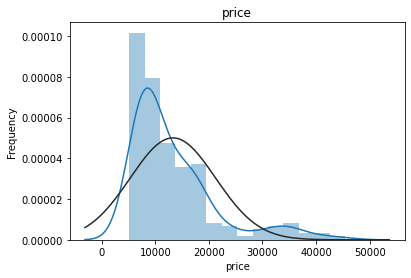

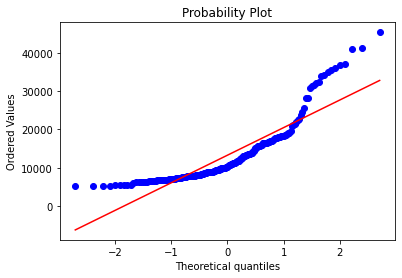

In [42]:
feature_plot(df, 'price')

**We Observed that Price data is skewed distribution**
Lets check with log of price 

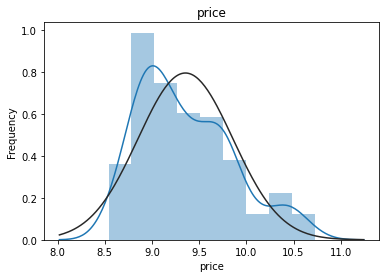

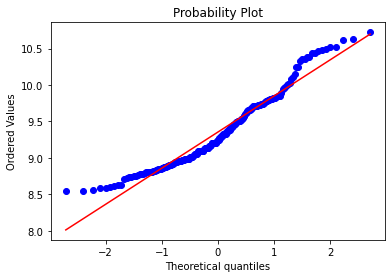

In [43]:
df.price = np.log(df.price)
feature_plot(df, 'price')

**this have imroved the distribution of price**

Lets Check distribution of other numerical features

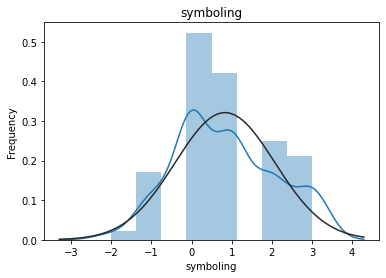

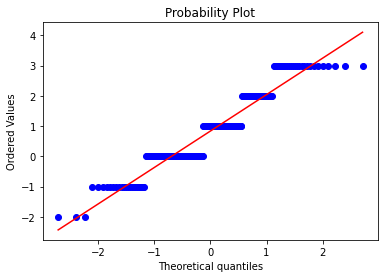

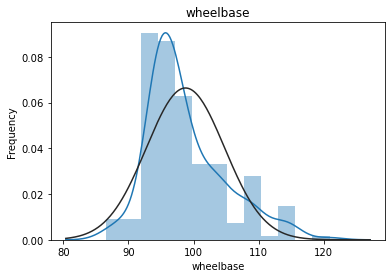

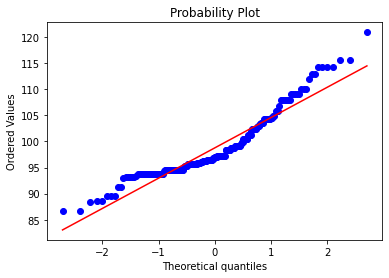

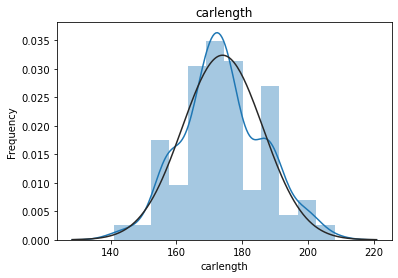

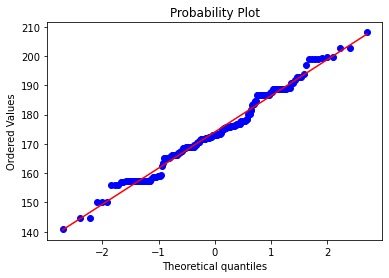

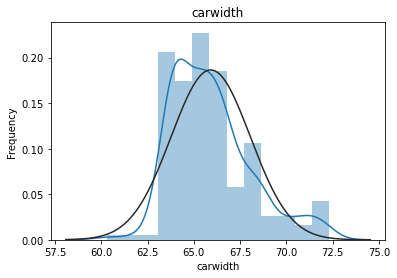

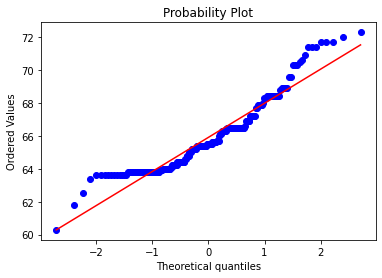

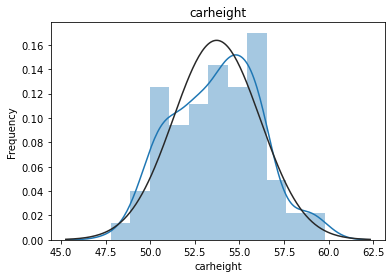

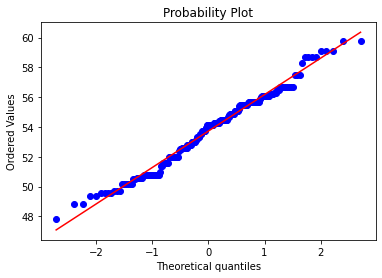

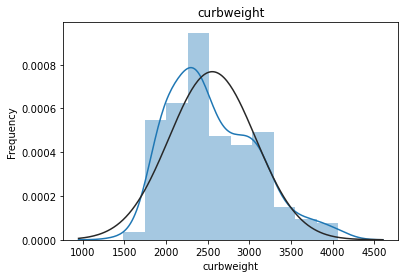

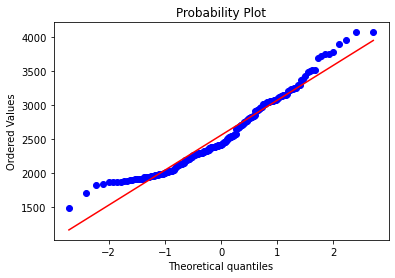

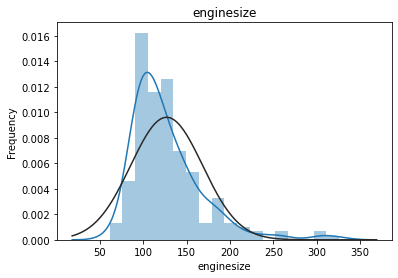

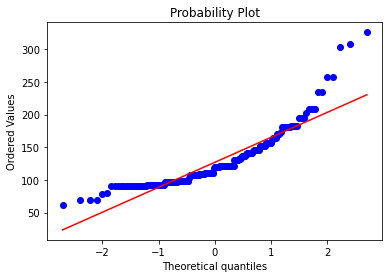

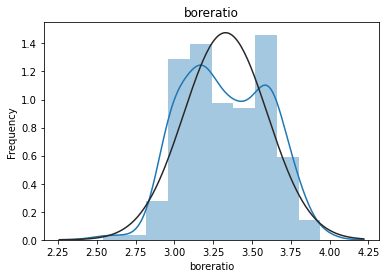

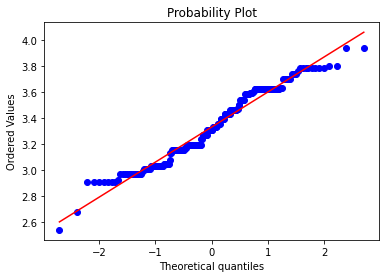

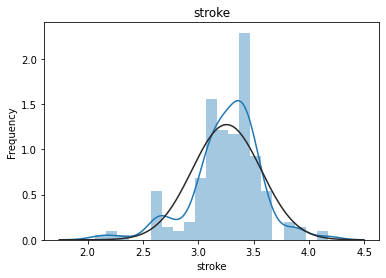

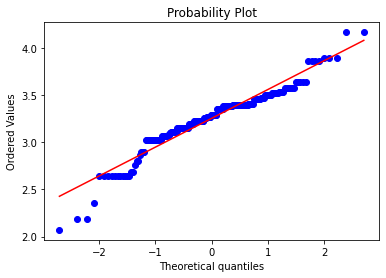

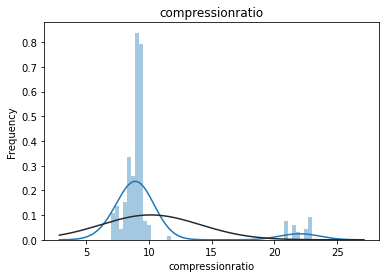

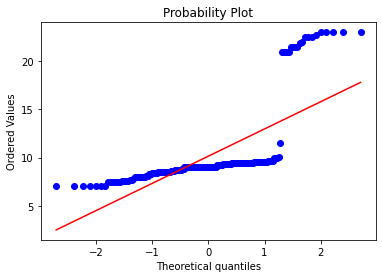

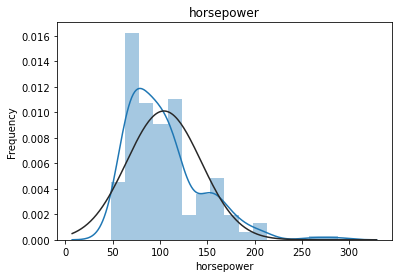

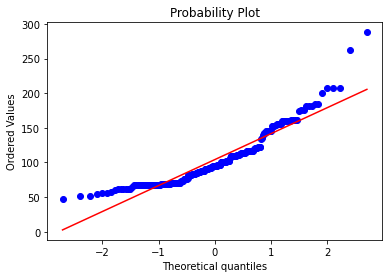

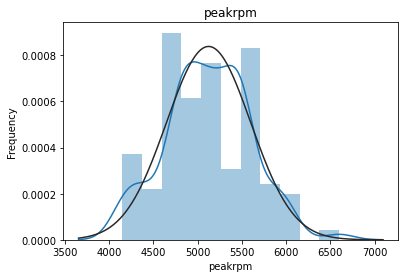

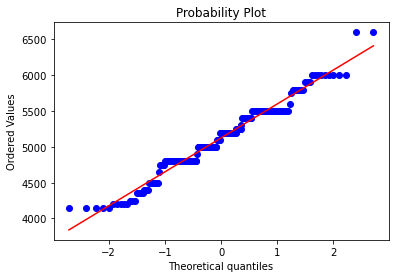

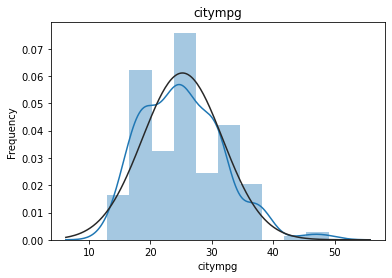

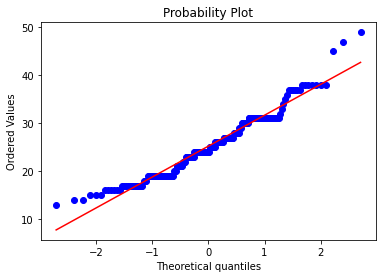

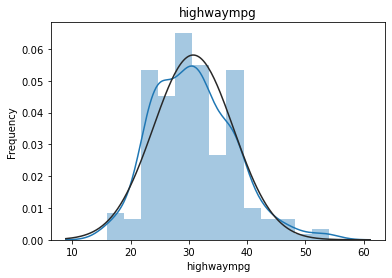

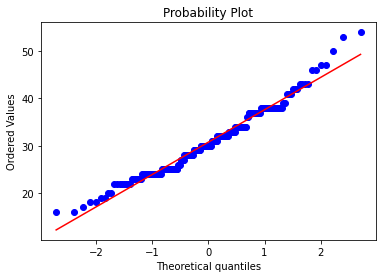

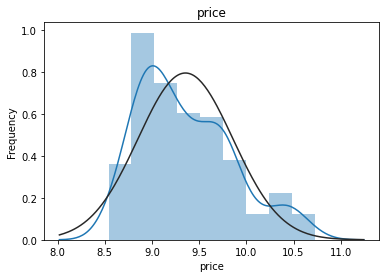

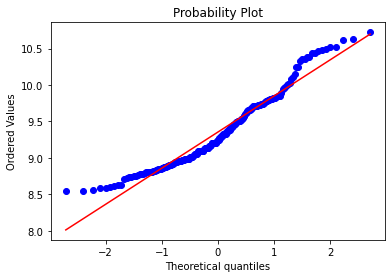

In [44]:
for feature in numerical_features:
    feature_plot(df, feature)

**Symboling is having range from -3 to 3 , lets change this to positive by adding 3**

In [45]:
df['symboling'] = df['symboling']+3
df['symboling'].value_counts()

3    67
4    54
5    32
6    27
2    22
1     3
Name: symboling, dtype: int64

In [46]:
skewed_features = df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)


Skew in numerical features: 



,Skew
compressionratio,2.591720
enginesize,1.933375
horsepower,1.395006
wheelbase,1.042514
carwidth,0.897375
curbweight,0.676402
price,0.667955
citympg,0.658838
highwaympg,0.536038
symboling,0.209525


In [47]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.3
for feature in skewed_features:
    df[feature] = boxcox(df[feature], lam)

There are 15 skewed numerical features to Box Cox transform


In [48]:
skewed_features = df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)


Skew in numerical features: 



,Skew
compressionratio,2.432453
enginesize,1.145215
wheelbase,0.926580
carwidth,0.834906
horsepower,0.719246
price,0.595712
curbweight,0.389203
citympg,0.186503
highwaympg,0.076092
carlength,0.014390


**We Can see there is significant reduction in skewness**

Lets check now Categorical features


In [49]:
df[categorical_features].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Make
0,gas,std,0,convertible,rwd,front,dohc,2,mpfi,alfa-romero
1,gas,std,0,convertible,rwd,front,dohc,2,mpfi,alfa-romero
2,gas,std,0,hatchback,rwd,front,ohcv,4,mpfi,alfa-romero
3,gas,std,2,sedan,fwd,front,ohc,2,mpfi,audi
4,gas,std,2,sedan,4wd,front,ohc,3,mpfi,audi


As we have changes the dorrnumber and cylindernumber, Lets drop them from df

In [50]:
categorical_features.remove('doornumber')


In [51]:
categorical_features.remove('cylindernumber')

In [52]:
df[categorical_features].head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,Make
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [53]:
df = pd.get_dummies(df, columns=categorical_features)
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Make_nissan,Make_peugeot,Make_plymouth,Make_porsche,Make_renault,Make_saab,Make_subaru,Make_toyota,Make_volkswagen,Make_volvo
0,2.372566,0,9.463687,12.193771,8.279445,7.367182,31.720747,2,11.023602,1.508140,...,0,0,0,0,0,0,0,0,0,0
1,2.372566,0,9.463687,12.193771,8.279445,7.367182,31.720747,2,11.023602,1.508140,...,0,0,0,0,0,0,0,0,0,0
2,1.719055,0,9.713595,12.259674,8.354961,7.598126,32.815310,4,11.713040,1.147091,...,0,0,0,0,0,0,0,0,0,0
3,2.068855,2,9.928938,12.405624,8.392295,7.715558,30.823402,2,10.284459,1.387470,...,0,0,0,0,0,0,0,0,0,0
4,2.068855,2,9.912969,12.405624,8.402912,7.715558,32.819152,3,11.219261,1.387470,...,0,0,0,0,0,0,0,0,0,0


### 3. Model Building and Evaluation

In [54]:
X = df.drop(['price'], axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
numerical_features= X.select_dtypes(include=['int64','float64']).columns.tolist()
x_train[numerical_features].head(3)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,0.770481,2,10.031660,12.378834,8.408211,7.691077,31.344608,2,10.752635,1.440059,1.537236,3.045401,9.609075,37.390958,5.626251,6.094757
75,1.719055,0,10.043394,12.453579,8.487046,7.745982,33.145979,2,11.346366,1.634034,1.356151,2.886887,12.362709,39.577776,4.729818,5.315193
174,0.770481,2,10.031660,12.378834,8.408211,7.752043,31.437432,2,10.321819,1.422680,1.457292,5.149355,8.741346,38.242647,5.913970,6.182195


**Scaling the numerical features**

In [56]:
scaler = StandardScaler()
x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])

In [58]:
x_test[numerical_features] = scaler.fit_transform(x_test[numerical_features])

### Training the model

In [66]:
def train_model(x_train, x_test, y_train, y_test):
    models = []
    n_folds = 20

    models.append(('R', Ridge(random_state=42)))
    models.append(('BR', BayesianRidge(n_iter=1000)))
    models.append(('KNR', KNeighborsRegressor()))
    models.append(('DTR', DecisionTreeRegressor(random_state=42)))
    models.append(('SVR', SVR()))
    models.append(('ABR', AdaBoostRegressor(n_estimators=300, random_state=42)))
    models.append(('BR', BaggingRegressor(n_estimators=300, random_state=42)))
    models.append(('GBR', GradientBoostingRegressor(n_estimators=300, random_state=42)))
    models.append(('XGB', XGBRegressor(n_estimators=300, random_state=42)))
    models.append(('RFR', RandomForestRegressor(n_estimators=300, random_state=42)))

    for name, model in models:

        kf = KFold(n_folds, shuffle=True, random_state=42)
        cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')

        model = model.fit(x_train, y_train)
        m_predict = model.predict(x_test)
        m_score = r2_score(np.exp(y_test), np.exp(m_predict))
        print("%s: r2_test = %.3f /// r2_train = %.3f" % (name, m_score, cv_results.mean()))

In [67]:
train_model(x_train, x_test, y_train, y_test)

R: r2_test = 0.922 /// r2_train = 0.857
BR: r2_test = 0.920 /// r2_train = 0.854
KNR: r2_test = 0.807 /// r2_train = 0.730
DTR: r2_test = 0.815 /// r2_train = 0.809
SVR: r2_test = 0.602 /// r2_train = 0.387
ABR: r2_test = 0.870 /// r2_train = 0.862
BR: r2_test = 0.888 /// r2_train = 0.865
GBR: r2_test = 0.896 /// r2_train = 0.857
XGB: r2_test = 0.890 /// r2_train = 0.847
RFR: r2_test = 0.887 /// r2_train = 0.864
